In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra

import wandb

from data.dataManager import DataManager
from model.modelCreator import ModelCreator
from omegaconf import OmegaConf
from scripts.run import setup_model, load_model_instance

from utils.plots import vae_plots
from utils.rbm_plots import plot_rbm_histogram, plot_rbm_params, plot_forward_output_v2

from scripts.run import set_device

[20:04:31.451] INFO   CaloQuVAE                                         Loading configuration.


In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="config")
config=compose(config_name="config.yaml")
wandb.init(tags = [config.data.dataset_name], project=config.wandb.project, entity=config.wandb.entity, config=OmegaConf.to_container(config, resolve=True), mode='disabled')

In [3]:
new_model = True
if new_model:
    self = setup_model(config)
    # self.model = self.model.double()  # sets all model parameters to float64
else:
    self = load_model_instance(config)
    # self.model = self.model.double()


[20:04:32.650] INFO   data.dataManager                                  Loading other dataset: CaloChallenge2
[20:04:32.654] INFO   data.dataManager                                  Keys: ['incident_energies', 'showers']


[20:04:37.608] INFO   data.dataManager                                  dict_keys(['incident_energies', 'showers'])
[20:04:37.610] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f5ca97d1e50>: 79999 events, 157 batches
[20:04:37.610] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f5a1f0aae10>: 10001 events, 10 batches
[20:04:37.610] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f5a1fbc2b70>: 9999 events, 10 batches
[20:04:37.611] INFO   model.modelCreator                                ::Creating Model
[20:04:38.351] INFO   dwave.cloud.client.base                           Fetching definitions of all available solvers
[20:04:38.395] INFO   dwave.cloud.client.base                           Received solver data for 7 solver(s).
[20:04:38.638] INFO   dwave.cloud.client.base                           Add

RBM_Hiddentorch initialized
cuda:0
encoder._networks.0.seq1.0.conv.weight True
encoder._networks.0.seq1.0.conv.bias True
encoder._networks.0.seq1.1.weight True
encoder._networks.0.seq1.1.bias True
encoder._networks.0.seq1.2.weight True
encoder._networks.0.seq1.3.conv.weight True
encoder._networks.0.seq1.3.conv.bias True
encoder._networks.0.seq1.4.weight True
encoder._networks.0.seq1.4.bias True
encoder._networks.0.seq1.5.weight True
encoder._networks.0.seq1.6.conv.weight True
encoder._networks.0.seq1.6.conv.bias True
encoder._networks.0.seq1.7.weight True
encoder._networks.0.seq1.7.bias True
encoder._networks.0.seq1.8.weight True
encoder._networks.0.seq2.0.conv.weight True
encoder._networks.0.seq2.0.conv.bias True
encoder._networks.0.seq2.1.weight True
encoder._networks.0.seq2.1.bias True
encoder._networks.0.seq2.2.weight True
encoder._networks.0.seq2.3.conv.weight True
encoder._networks.0.seq2.3.conv.bias True
encoder._networks.0.seq2.4.weight True
encoder._networks.1.seq1.0.conv.weig

In [4]:
self.evaluate_vae(self.data_mgr.val_loader,0)

[20:05:17.968] INFO   engine.engine                                     Epoch: 0 - Average Val Loss: 62132.4348


{'val_ae_loss': 58179.002734375,
 'val_kl_loss': 177.08904418945312,
 'val_hit_loss': 3776.3433349609377,
 'val_entropy': -418.1646270751953,
 'val_pos_energy': -255.81539154052734,
 'val_neg_energy': 851.0690673828125,
 'val_loss': 62132.434765625}

In [6]:
self.prior_samples.shape
self.post_samples.shape

torch.Size([9999, 906])

In [ ]:

self.prior_samples[:self.post_samples.shape[0],:self.post_samples.shape[1]]

tensor([[1., 1., 0.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 1.],
        ...,
        [0., 0., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 0., 1., 1.]])

In [25]:
from utils.correlation_plotting import compute_voxelwise_correlation_matrix, frobenius_distance, all_cross_partition_corr, plot_all_cross_pairs_grid

In [18]:
a = compute_voxelwise_correlation_matrix(self.post_samples)
b = compute_voxelwise_correlation_matrix(self.prior_samples)
frobenius_distance(a, b[:a.shape[1], :a.shape[1]])

37.11894607543945

In [13]:
print(a.shape, b.shape)

torch.Size([906, 906]) torch.Size([1208, 1208])


In [28]:
cross_corrs_post = all_cross_partition_corr(self.post_samples, 4, 302)

In [24]:
cross_corrs_post.keys()

dict_keys([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])

/home/jtoledo/CaloQuVAE/utils/correlation_plotting.py:501: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(C, vmin=-vmax, vmax=vmax, cmap="RdBu_r", origin="lower")


(<Figure size 1800x1080 with 7 Axes>,
 array([<Axes: title={'center': 'p0 vs p1'}, xlabel='nodes p1', ylabel='nodes p0'>,
        <Axes: title={'center': 'p0 vs p2'}, xlabel='nodes p2', ylabel='nodes p0'>,
        <Axes: title={'center': 'p0 vs p3'}, xlabel='nodes p3', ylabel='nodes p0'>,
        <Axes: title={'center': 'p1 vs p2'}, xlabel='nodes p2', ylabel='nodes p1'>,
        <Axes: title={'center': 'p1 vs p3'}, xlabel='nodes p3', ylabel='nodes p1'>,
        <Axes: title={'center': 'p2 vs p3'}, xlabel='nodes p3', ylabel='nodes p2'>],
       dtype=object))

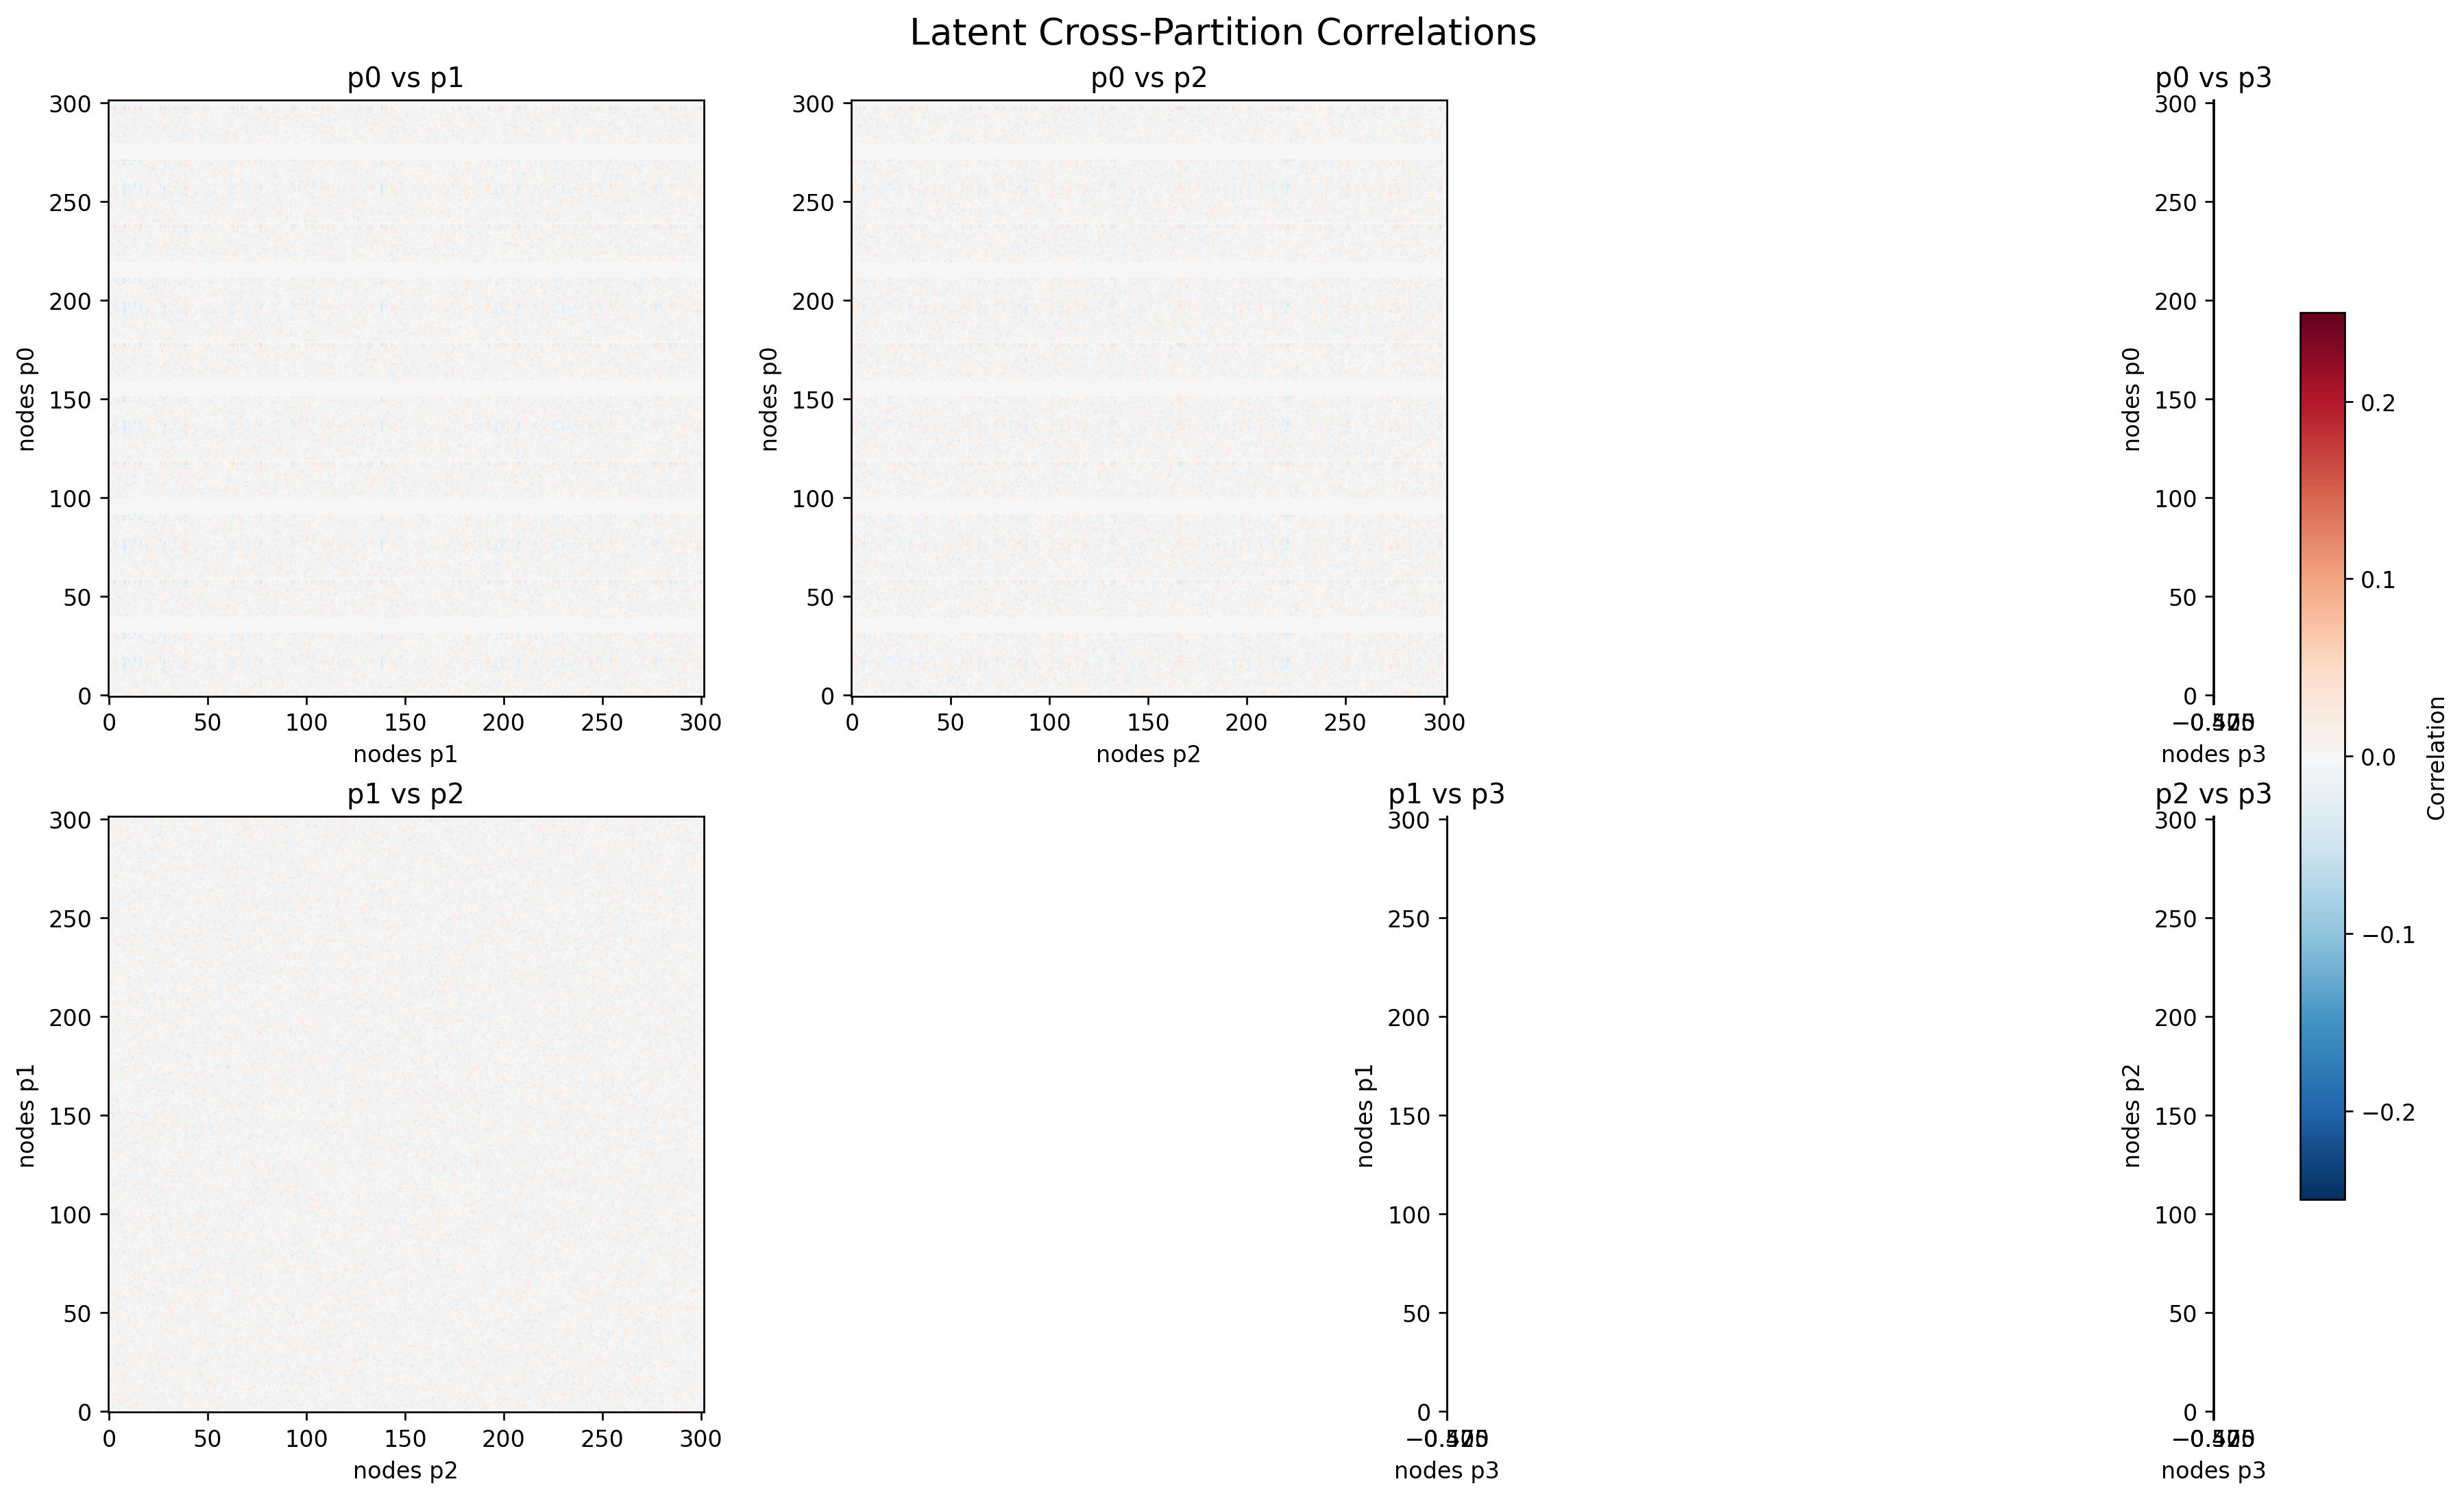

In [29]:
plot_all_cross_pairs_grid(cross_corrs_post, 4)

In [32]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from einops import rearrange
from model.decoder.decoderhierarchy0 import DecoderLinAtt

class DecoderHierarchy0(nn.Module):
    def __init__(self, cfg):
        super(DecoderHierarchy0, self).__init__()
        self._config = cfg
        self._create_hierarchy_network()
        self._create_skipcon_decoders()

    # def _create_hierarchy_network(self):
    #     self.latent_nodes = self._config.rbm.latent_nodes_per_p * self._config.rbm.partitions
    #     self.hierarchical_lvls = self._config.rbm.partitions

    #     inp_layers = self._config.model.decoder_input
    #     out_layers = self._config.model.decoder_output

    #     self.moduleLayers = nn.ModuleList([])
    #     for i in range(len(inp_layers)):
    #         # self.moduleLayers.append(Decoder(self._config, inp_layers[i], out_layers[i]))   
    #         self.moduleLayers.append(DecoderLinAtt(self._config, inp_layers[i], out_layers[i]))   

    def _create_hierarchy_network(self):
        self.latent_nodes = self._config.rbm.latent_nodes_per_p * (self._config.rbm.partitions - self._config.model.hidden_layer)
        self.hierarchical_lvls = self._config.rbm.partitions

        inp_layers = self._config.model.decoder_input
        out_layers = self._config.model.decoder_output

        self.moduleLayers = nn.ModuleList([])
        for i in range(len(inp_layers)):
            # self.moduleLayers.append(Decoder(self._config, inp_layers[i], out_layers[i]))   
            self.moduleLayers.append(DecoderLinAtt(self._config, inp_layers[i], out_layers[i]))   

    def _create_skipcon_decoders(self):
        latent_inp = 2 * self._config.rbm.latent_nodes_per_p
        self.subdecs = nn.ModuleList([])
        for i in range(len(self._config.model.decoder_output)-1):
            recon_out = self.latent_nodes + self._config.model.decoder_output[i]
            self.subdecs.append(nn.Conv3d(latent_inp, recon_out, kernel_size=1, stride=1, padding=0))
    
    def forward(self, x, x0):
        x_lat = x
        self.x1, self.x2 = torch.tensor([]).to(x.device), torch.tensor([]).to(x.device) # store hits and activation tensors
        for lvl in range(len(self.moduleLayers)):
            print(lvl)
            cur_net = self.moduleLayers[lvl]
            output_hits, output_activations = cur_net(x, x0)
            z = output_hits * output_activations
            if lvl == len(self.moduleLayers) - 1:
                self.x1 = output_hits
                self.x2 = output_activations
            else:
                # partition_ind_start = (len(self.moduleLayers) - 1 - lvl) * self._config.rbm.latent_nodes_per_p
                # partition_ind_end = (len(self.moduleLayers) - lvl) * self._config.rbm.latent_nodes_per_p
                partition_ind_start = (lvl+1) * self._config.rbm.latent_nodes_per_p
                partition_ind_end = (lvl+2) * self._config.rbm.latent_nodes_per_p
                enc_z = torch.cat((x[:,0:self._config.rbm.latent_nodes_per_p], x[:,partition_ind_start:partition_ind_end]), dim=1)
                print(enc_z.shape, partition_ind_start, partition_ind_end)
                enc_z = torch.unflatten(enc_z, 1, (2 * self._config.rbm.latent_nodes_per_p, 1, 1, 1))
                enc_z = self.subdecs[lvl](enc_z).view(enc_z.size(0), -1)
                xz = torch.cat((x_lat, z), dim=1)
                x = enc_z + xz
        return self.x1, self.x2
    
dec = DecoderHierarchy0(config)

In [33]:
dec(torch.rand(2,906), torch.rand(2,1))

0
torch.Size([2, 604]) 302 604
1
torch.Size([2, 604]) 604 906
2
torch.Size([2, 604]) 906 1208
3


(tensor([[-0.8786, -0.9628, -0.7389,  ..., -0.9725, -0.8833, -0.8972],
         [-0.8795, -0.9216, -0.7406,  ..., -0.9354, -0.8666, -0.8861]],
        grad_fn=<ViewBackward0>),
 tensor([[-0.2725, -0.2767, -0.2698,  ..., -0.2550, -0.2777, -0.2703],
         [-0.2725, -0.2767, -0.2697,  ..., -0.2550, -0.2776, -0.2704]],
        grad_fn=<ViewBackward0>))

In [17]:
# self.model((torch.rand(2,6480).to(self.device), torch.rand(2,1).to(self.device)))
self.model.decoder(torch.rand(2,906).to(self.device), torch.rand(2,1).to(self.device))

RuntimeError: unflatten: Provided sizes [604, 1, 1, 1] don't multiply up to the size of dim 1 (302) in the input tensor